In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df= pd.read_csv("/content/DKHousingPricesSample100k.csv")


In [ ]:
df_ml = df.drop(columns=[
    'date','quarter','house_id','address','city'
])


In [ ]:
df_ml = pd.get_dummies(
    df_ml,
    columns=['house_type','region','sales_type','area'],
    drop_first=False
)


In [ ]:
df_ml = df_ml.fillna(df_ml.mode().iloc[0])


In [ ]:
X = df_ml.values


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
from sklearn.decomposition import PCA

pca3 = PCA(n_components=3, random_state=42)
X_p3 = pca3.fit_transform(X_scaled)

print("Explained variance ratios (3 PCs):", pca3.explained_variance_ratio_)
print("Cumulative (3 PCs):", pca3.explained_variance_ratio_.sum())


Explained variance ratios (3 PCs): [0.14014995 0.08703925 0.07622345]
Cumulative (3 PCs): 0.3034126493366254


In [ ]:
pca2 = PCA(n_components=2, random_state=42)
X_p2 = pca2.fit_transform(X_scaled)

print("Explained variance ratios (2 PCs):", pca2.explained_variance_ratio_)
print("Cumulative (2 PCs):", pca2.explained_variance_ratio_.sum())


Explained variance ratios (2 PCs): [0.14014995 0.08703925]
Cumulative (2 PCs): 0.22718920215516158


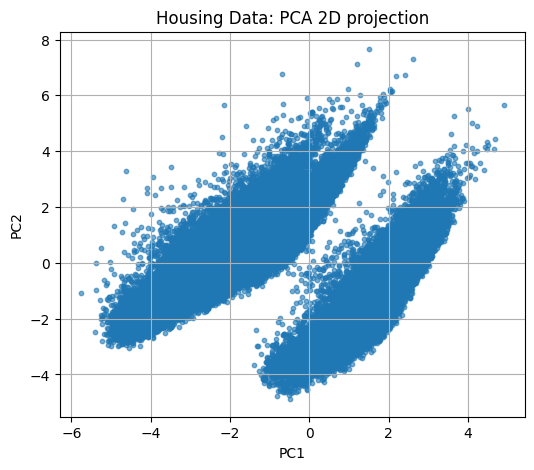

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X_p2[:,0], X_p2[:,1], s=10, alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Housing Data: PCA 2D projection")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Ks = range(2,4)
inertias = []
sil_scores = []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))


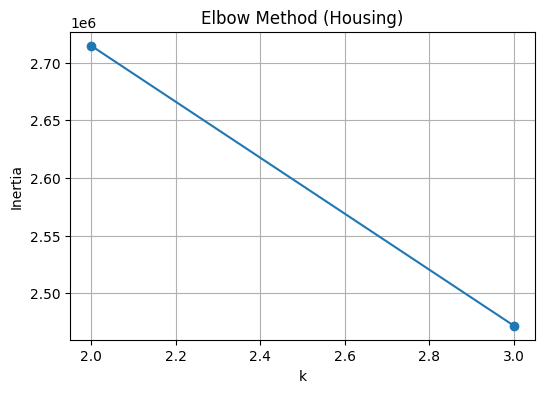

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(list(Ks), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method (Housing)")
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(6,4))
plt.plot(list(Ks), sil_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette Score (Housing)")
plt.grid(True)
plt.show()


In [ ]:
optimal_k = Ks[int(np.argmax(sil_scores))]
print("Chosen k:", optimal_k)


   purchase_price price_category
0         6500000           High
1         3400000           High
2         4550000           High
3         1630000         Medium
4         1975000         Medium
5         1850000         Medium
6          360000            Low
7          700000            Low
8          500000            Low
9          850000            Low
Silhouette Score: 0.191


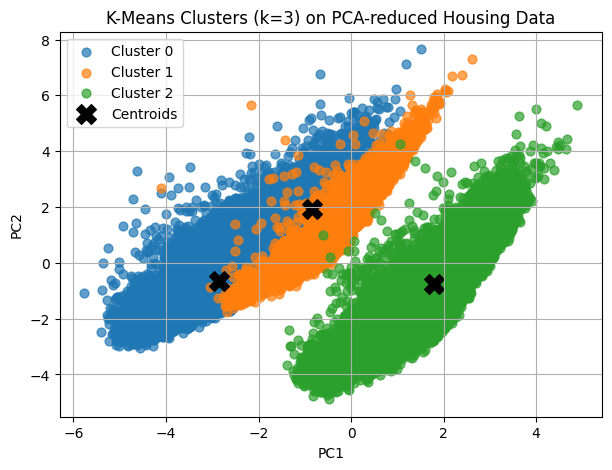

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


price_bins = df_ml['purchase_price'].quantile([0, 0.33, 0.66, 1.0]).values
price_labels = ['Low', 'Medium', 'High']
df_ml['price_category'] = pd.cut(df_ml['purchase_price'],
                                 bins=price_bins,
                                 labels=price_labels,
                                 include_lowest=True)

print(df_ml[['purchase_price', 'price_category']].head(10))
X = df_ml.drop(columns=['price_category']).values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca2 = PCA(n_components=2, random_state=42)
X_p2 = pca2.fit_transform(X_scaled)

optimal_k
km = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = km.fit_predict(X_scaled)

# Silhouette score
sil = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil:.3f}")

#  Scatter plot
plt.figure(figsize=(7,5))
for cluster in range(k):
    mask = labels == cluster
    plt.scatter(X_p2[mask,0], X_p2[mask,1], label=f"Cluster {cluster}", s=40, alpha=0.7)

km_on_pca = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_p2)
plt.scatter(km_on_pca.cluster_centers_[:,0], km_on_pca.cluster_centers_[:,1],
            marker='X', s=200, color='black', label='Centroids')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clusters (k=3) on PCA-reduced Housing Data")
plt.legend()
plt.grid(True)
plt.show()
